In [1]:
import MDAnalysis
import numpy as np
import matplotlib.pyplot as plt
import os
import plumed

/Users/yunyao_1/miniforge3/envs/plumed_tutorial/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exercise-1 
# simple statistics using plumed

In [23]:
%%bash

mkdir ../Exercises/Exercise_1
cd ../Exercises/Exercise_1

cat > plumed.dat <<EOF

data: READ FILE=../../data/uncorrelated_data VALUES=rand
av: AVERAGE ARG=data STRIDE=1 
PRINT ARG=av FILE=colvar 
EOF
plumed driver --noatoms  > /dev/null

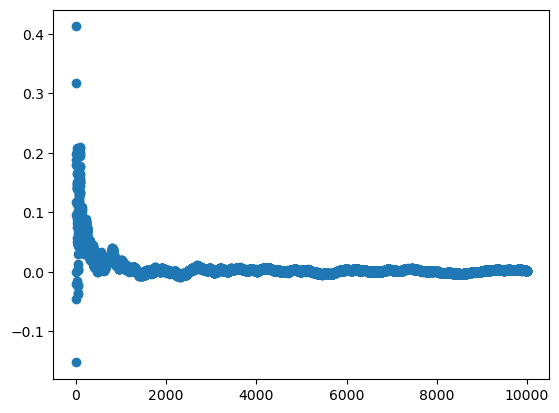

In [25]:
hist_data=np.loadtxt('../Exercises/Exercise_1/colvar')
plt.plot(hist_data[:,0],hist_data[:,1],'o')

In [51]:
#Exericse 2: from population density to free energy
ex2 = '''UNITS NATURAL
          data: READ FILE=../../data/uncorrelated_data VALUES=rand
          hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 KERNEL=DISCRETE
          fes: CONVERT_TO_FES GRID=hhh TEMP=1
          DUMPGRID GRID=fes FILE=fes.dat'''

In [65]:
!mkdir ../Exercises/Exercise_2
f = open("../Exercises/Exercise_2/plumed.dat", "w")
f.write(ex2)
f.close
!cd ../Exercises/Exercise_2 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_2: File exists


Text(0.5, 0, 'cv')

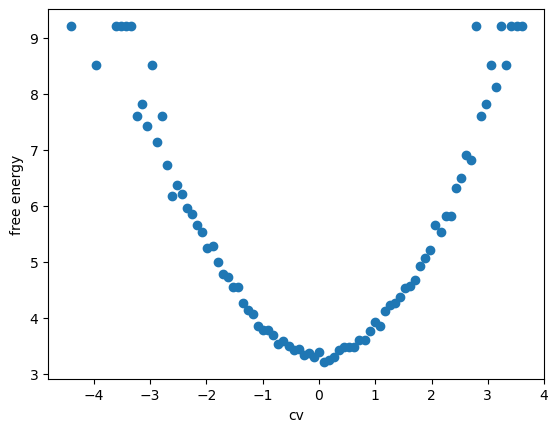

In [66]:
fep_hist=np.loadtxt('../Exercises/Exercise_2/fes.dat')
plt.plot(fep_hist[:,0],fep_hist[:,1],'o')
plt.ylabel('free energy')
plt.xlabel('cv')

In [69]:
# exercise 3: calculate variance
# variance= 1/(n-1) [ 1/n* xi**2 - mean**2]
ex3='''
UNITS NATURAL
data: READ FILE=../../data/uncorrelated_data VALUES=rand 
# This line should calculate the square of the quantity read in from the file above
d2: CUSTOM ARG=data FUNC=x*x PERIODIC=NO 
# Calculate the average from the read-in data
av: AVERAGE ARG=data STRIDE=1 
# Calculate the average of the squares of the read in data
av2: AVERAGE ARG=d2 STRIDE=1 
# Evaluate the variance using the expression above
var: MATHEVAL ARG=av,av2 FUNC=y-x*x PERIODIC=NO 
# Print the variance
PRINT ARG=var FILE=colvar 
'''

In [71]:
#!mkdir ../Exercises/Exercise_3
f = open("../Exercises/Exercise_3/plumed.dat", "w")
f.write(ex3)
f.close
#!cd ../Exercises/Exercise_3 && plumed driver --noatoms > /dev/null
!cd ../Exercises/Exercise_3 && plumed driver --noatoms > /dev/null

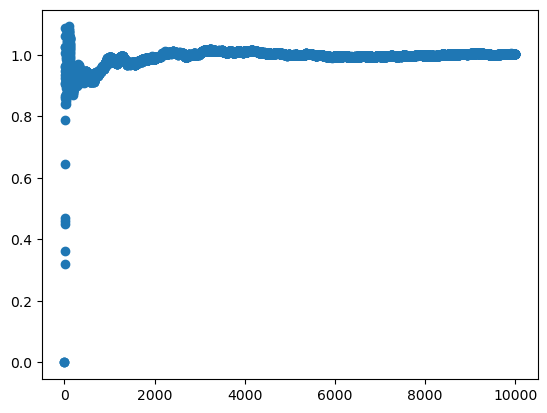

In [72]:
#plot 
data_hist=np.loadtxt('../Exercises/Exercise_3/colvar')
plt.plot(data_hist[:,0],data_hist[:,1],'o')
#plt.xlabel('free energy')
#plot.ylabel()

In [43]:
#exericse 4: calculate block average

ex4='''data: READ FILE=../../data/uncorrelated_data VALUES=rand 
av: AVERAGE ARG=data STRIDE=1 CLEAR=500 
PRINT ARG=av STRIDE=500 FILE=colvar 
'''


In [74]:
!mkdir ../Exercises/Exercise_4
f = open("../Exercises/Exercise_4/plumed.dat", "w")
f.write(ex4)
f.close
!cd ../Exercises/Exercise_4 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_4: File exists


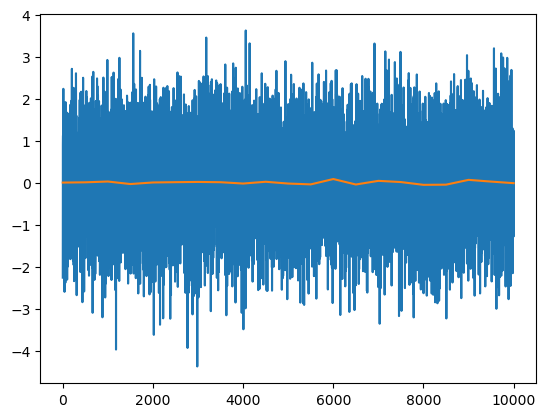

In [75]:
data = np.loadtxt('../data/uncorrelated_data')
block_av=np.loadtxt('../Exercises/Exercise_4/colvar')
plt.plot(data[:,0],data[:,1])
plt.plot(block_av[:,0],block_av[:,1])

In [33]:
#exercise: block average for fep calculation 
ex5 = '''UNITS NATURAL
          data: READ FILE=../../data/uncorrelated_data VALUES=rand
          hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=-4.5 GRID_MAX=4.5 GRID_BIN=100 CLEAR=1000 KERNEL=DISCRETE
          DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000'''

In [34]:
# Make a directory to hold the exercise
!mkdir ../Exercises/Exercise_5
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_5/plumed.dat", "w")
f.write( pex5 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_5 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_5: File exists


(101, 2)


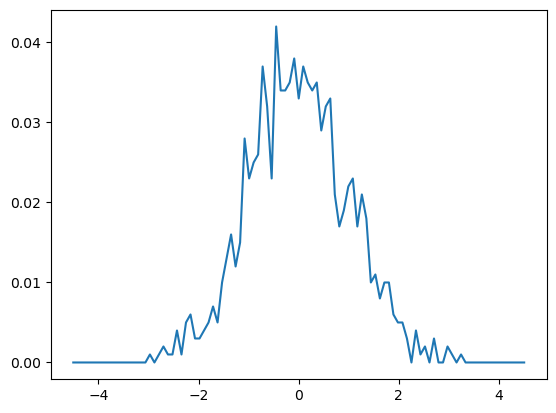

In [36]:
hist_data=np.loadtxt('../Exercises/Exercise_5/hist.dat')
plt.plot(hist_data[:,0],hist_data[:,1])
print(hist_data.shape)

In [38]:
!ls ../Exercises/Exercise_5

analysis.0.hist.dat  analysis.15.hist.dat analysis.5.hist.dat
analysis.1.hist.dat  analysis.16.hist.dat analysis.6.hist.dat
analysis.10.hist.dat analysis.17.hist.dat analysis.7.hist.dat
analysis.11.hist.dat analysis.18.hist.dat analysis.8.hist.dat
analysis.12.hist.dat analysis.2.hist.dat  analysis.9.hist.dat
analysis.13.hist.dat analysis.3.hist.dat  hist.dat
analysis.14.hist.dat analysis.4.hist.dat  plumed.dat


#from population to calculate FEP
1. calculate average histgram (over several histgram)
2. calculate variance of histgram 
3. calculate fep based average histgram
4. calcalate fep error based on histogram variance

/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_11719/896203680.py:17: RuntimeWarning: divide by zero encountered in log
  fes = -np.log( average )
/var/folders/21/7pys71p923x0l1lrp08ll2w00000gp/T/ipykernel_11719/896203680.py:19: RuntimeWarning: invalid value encountered in divide
  ferr = error / average


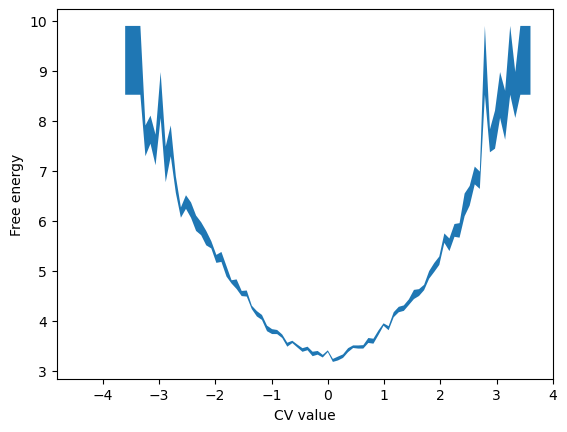

In [39]:
import glob

hist1 = np.loadtxt("../Exercises/Exercise_5/hist.dat")
N, average, average2 = 1, hist1[:,1], hist1[:,1]*hist1[:,1]
for filen in glob.glob( "../Exercises/Exercise_5/analysis.*.hist.dat") : 
    histn = np.loadtxt(filen)
    N, average, average2 = N + 1, average + histn[:,1], average2 + histn[:,1]*histn[:,1]
    
#  averages  of histgram
average = average / N  
# Final variances
var = (N/(N-1))*( average2 / N - average*average ) 
# Errors
error = np.sqrt( var / N )

# Convert to free energy 
fes = -np.log( average )
# Convert to error in fes
ferr = error / average 

# And draw graph of free energy surface
plt.fill_between( hist1[:,0], fes-ferr, fes+ferr )
plt.xlabel("CV value")
plt.ylabel('Free energy')
plt.show()

In [ ]:
#ex8: reweight a biased data
problem description='''
x taken from random [0,1] based on a gaussian distribution, so the output is biased by gaussian
reweight this distribution so tha the unbiased x distribution is a uniform random distribution in range of [0, 1] 
''' 


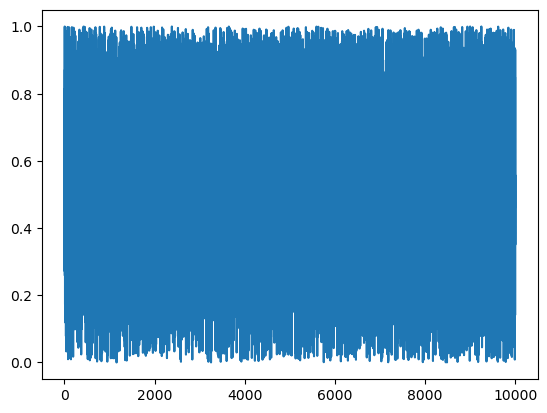

In [76]:
#plot the biased data
data_biased= np.loadtxt('../data/weighted_data')
plt.plot(data_biased[:,0],data_biased[:,1])

In [77]:
# plot the biased distribution
ex8_1='''
UNITS NATURAL # This ensures that Boltzmann's constant is one 
data: READ FILE=../../data/weighted_data VALUES=rand IGNORE_FORCES
hhh: HISTOGRAM ARG=data STRIDE=1 GRID_MIN=0 GRID_MAX=1 GRID_BIN=100  KERNEL=DISCRETE
DUMPGRID GRID=hhh FILE=bias_hist.dat
'''

In [79]:
!mkdir ../Exercises/Exercise_8
# Output the input file to the plumed.dat file
f = open("../Exercises/Exercise_8/plumed.dat", "w")
f.write( ex8_1 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_8 && plumed driver --noatoms > /dev/null

mkdir: ../Exercises/Exercise_8: File exists


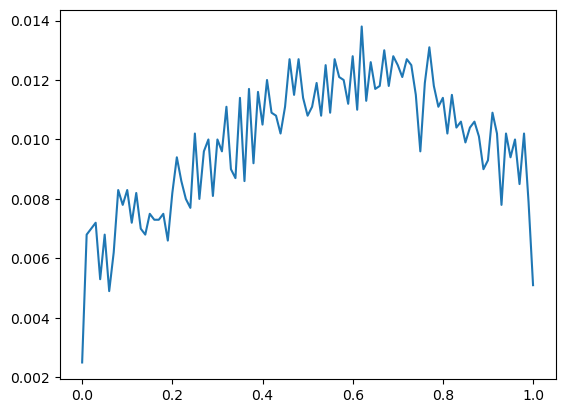

In [81]:
bias_hist= np.loadtxt('../Exercises/Exercise_8/bias_hist.dat')
plt.plot(bias_hist[:,0],bias_hist[:,1])  # roughly a guassian distribution center at 0.6

In [83]:

ex8_2 = '''UNITS NATURAL # This ensures that Boltzmann's constant is one 
          data: READ FILE=../../data/weighted_data VALUES=rand IGNORE_FORCES 
          mm: RESTRAINT ARG=data AT=0.6 KAPPA=4 
          rw: REWEIGHT_BIAS TEMP=1 
          PRINT ARG=data,rw FILE=reweight
          wav: AVERAGE ARG=data STRIDE=1 LOGWEIGHTS=rw
          dd: CUSTOM ARG=data,wav FUNC=(x-y)*(x-y) PERIODIC=NO
          uvar: AVERAGE ARG=dd STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false
          one: CONSTANT VALUE=1
          wsum: AVERAGE ARG=one STRIDE=1 LOGWEIGHTS=rw NORMALIZATION=false
          var: CUSTOM ARG=uvar,wsum FUNC=x/(y-1) PERIODIC=NO
          PRINT ARG=wav,var STRIDE=1 FILE=colvar
          hhh: HISTOGRAM ARG=data LOGWEIGHTS=rw GRID_MIN=0 GRID_MAX=1 GRID_BIN=20 CLEAR=1000 NORMALIZATION=true KERNEL=DISCRETE
          DUMPGRID GRID=hhh FILE=hist.dat STRIDE=1000'''

In [84]:
# now unweighted the data
f = open("../Exercises/Exercise_8/plumed.dat", "w")
f.write( ex8_2 )
f.close()
# Run PLUMED
!cd ../Exercises/Exercise_8 && plumed driver --noatoms > /dev/null


In [85]:
# display data and according weighting factor :  1/gaussian
data_weight= np.loadtxt('../Exercises/Exercise_8/reweight')
data_weight[:5] # frame, biased_data, weights

array([[0.00000e+00, 6.53881e-01, 5.80600e-03],
       [1.00000e+00, 2.72487e-01, 2.14529e-01],
       [2.00000e+00, 5.66507e-01, 2.24400e-03],
       [3.00000e+00, 7.33355e-01, 3.55670e-02],
       [4.00000e+00, 4.14843e-01, 6.85660e-02]])

In [86]:
# display the reweighted avearage and variance
av_var_unbias= np.loadtxt('../Exercises/Exercise_8/colvar')
av_var_unbias # av, variance

array([[ 0.00000e+00,  0.00000e+00, -0.00000e+00],
       [ 1.00000e+00,  2.72487e-01, -0.00000e+00],
       [ 2.00000e+00,  4.03951e-01,  3.84554e-01],
       ...,
       [ 9.99800e+03,  5.04392e-01,  8.38710e-02],
       [ 9.99900e+03,  5.04377e-01,  8.38810e-02],
       [ 1.00000e+04,  5.04382e-01,  8.38760e-02]])

<ErrorbarContainer object of 3 artists>

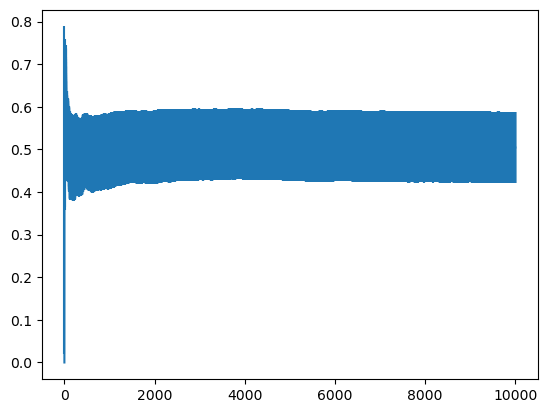

In [87]:
plt.errorbar(av_var_unbias[:,0], av_var_unbias[:,1], yerr=av_var_unbias[:,2])


[[0.       0.038377]
 [0.05     0.044457]
 [0.1      0.063507]]


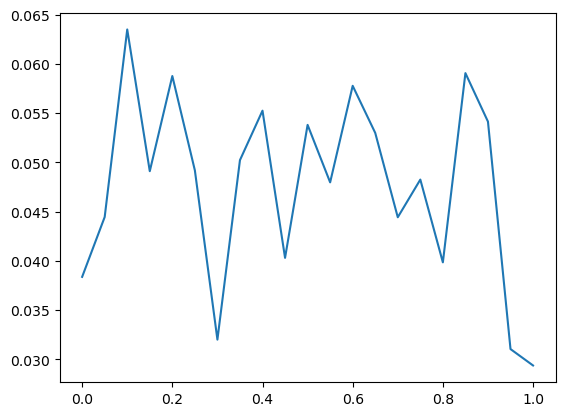

In [95]:
# plot one of the blocked averaged histogram
unbias_hist= np.loadtxt('../Exercises/Exercise_8/hist.dat')
plt.plot(unbias_hist[:,0],unbias_hist[:,1])
print(unbias_hist[:3])

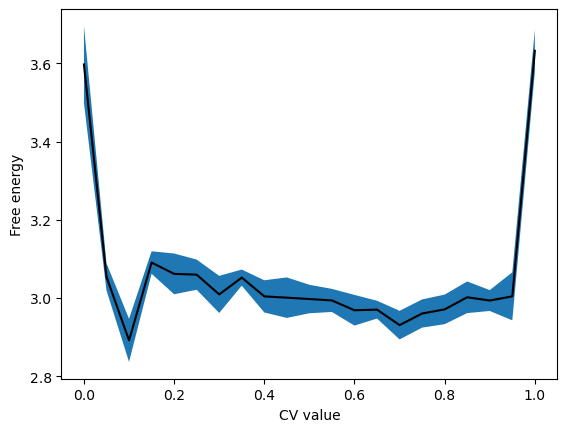

In [89]:
# now used blocked average histogram data, then calculate fep and its error
#similar to ex 5
import glob

# Function to read in histogram data and normalization
def readhistogram( fname ) :
        # Read in the histogram data
        data = np.loadtxt( fname )
        with open( fname, "r" ) as myfile :
                for line in myfile :
                        if line.startswith("#! SET normalisation") : norm = line.split()[3]
        return float(norm), data

# Calculate weighted average
norm1, hist1 = readhistogram( "../Exercises/Exercise_8/hist.dat" )
N, average = norm1, norm1*hist1[:,1]
for filen in glob.glob( "../Exercises/Exercise_8/analysis.*.hist.dat") : 
    norm, histn = readhistogram(filen)
    N, average = N + norm, average + norm*histn[:,1]
average = average / N

# Calculate errors
N1 = 1 
norm1, hist1 = readhistogram( "../Exercises/Exercise_8/hist.dat" )
error = norm1*norm1*(hist1[:,1]-average[:])**2
for filen in glob.glob( "../Exercises/Exercise_8/analysis.*.hist.dat") : 
    norm, histn = readhistogram(filen)
    error, N1 = error + norm*norm*(histn[:,1]-average[:])**2, N1+1
error = np.sqrt( (error / (N*N)) )

# Convert to free energy 
fes = -np.log( average )
# Convert to error in fes
ferr = error / average 

# And draw graph of free energy surface
plt.fill_between( hist1[:,0], fes-ferr, fes+ferr )
plt.plot( hist1[:,0], fes, 'k-' )
plt.xlabel("CV value")
plt.ylabel('Free energy')
plt.show()


The fep result show that unbiased data is almost a uniform random distribution in range [0, 1]

# Metadynamics simulation
## fep calculation from meta biased trajactory

In [90]:
# ex9: run metadynamic simulation on Lennard Jones 7
# to prevent cluster dissociation, restraints are added so that atoms do not move too far away from COM
ex9a = '''UNITS NATURAL
COM ATOMS=1-7 LABEL=com
DISTANCE ATOMS=1,com LABEL=d1
UPPER_WALLS ARG=d1 AT=2.0 KAPPA=100.
DISTANCE ATOMS=2,com LABEL=d2
UPPER_WALLS ARG=d2 AT=2.0 KAPPA=100.
DISTANCE ATOMS=3,com LABEL=d3
UPPER_WALLS ARG=d3 AT=2.0 KAPPA=100.
DISTANCE ATOMS=4,com LABEL=d4
UPPER_WALLS ARG=d4 AT=2.0 KAPPA=100.
DISTANCE ATOMS=5,com LABEL=d5
UPPER_WALLS ARG=d5 AT=2.0 KAPPA=100.
DISTANCE ATOMS=6,com LABEL=d6
UPPER_WALLS ARG=d6 AT=2.0 KAPPA=100.
DISTANCE ATOMS=7,com LABEL=d7
UPPER_WALLS ARG=d7 AT=2.0 KAPPA=100.

# calculateion covar coordination number 
c1: COORDINATIONNUMBER SPECIES=1-7 MOMENTS=2-3 SWITCH={RATIONAL R_0=1.5 NN=8 MM=16}

# run meta dynamics
METAD ARG=c1.* HEIGHT=0.05 PACE=500 SIGMA=0.1,0.1 GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=500,500 BIASFACTOR=5'''

In [91]:
# configuration file
pin = '''inputfile input.xyz
outputfile output.xyz
temperature 0.1
tstep 0.005
friction 1
forcecutoff 2.5
listcutoff  3.0
ndim 2
nstep 1000000
nconfig 100 trajectory.xyz
nstat   1000 energies.dat'''


In [92]:
f = open('../data/in','w')
f.write(pin)
f.close()

In [94]:
!mkdir ../Exercises/Exercise_9
!cp ../data/in ../Exercises/Exercise_9
!cp ../data/input.xyz ../Exercises/Exercise_9
# Output the plumed input
f = open("../Exercises/Exercise_9/plumed.dat", "w")
f.write( ex9a )
f.close()

# And run plumed simplemd 
!cd ../Exercises/Exercise_9 && plumed simplemd < in > /dev/null

mkdir: ../Exercises/Exercise_9: File exists


In [112]:
# reweight data
ex9b = '''UNITS NATURAL
c1: COORDINATIONNUMBER SPECIES=1-7 MOMENTS=2-3 SWITCH={RATIONAL R_0=1.5 NN=8 MM=16}
# output the biased colvar distribution
PRINT ARG=c1.* FILE=colvar
hhh: HISTOGRAM ARG=c1.* GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=200,200 BANDWIDTH=0.02,0.02  
DUMPGRID GRID=hhh FILE=biased_histogram.dat 
#by setting PACE=50000000, we don't add guassian but simply retrive the sum of previous guassiau bias
METAD ARG=c1.* HEIGHT=0.05 PACE=50000000 SIGMA=0.1,0.1 GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=500,500 TEMP=0.1 BIASFACTOR=5 RESTART=YES
rw: REWEIGHT_BIAS TEMP=0.1
hh: HISTOGRAM ARG=c1.* GRID_MIN=-1.5,-1.5 GRID_MAX=2.5,2.5 GRID_BIN=200,200 BANDWIDTH=0.02,0.02 LOGWEIGHTS=rw CLEAR=2500 NORMALIZATION=true
DUMPGRID GRID=hh FILE=my_histogram.dat STRIDE=2500'''

In [113]:
# Output the plumed input
f = open("../Exercises/Exercise_9/plumed_reweight.dat", "w")
f.write( ex9b )
f.close()

!cd ../Exercises/Exercise_9 && plumed driver --plumed plumed_reweight.dat --ixyz trajectory.xyz  --initial-step 1 > /dev/null

[[1.100000e+01 7.387700e-01 1.271239e+00]
 [1.200000e+01 7.401950e-01 1.277285e+00]
 [1.300000e+01 7.359010e-01 1.265292e+00]
 ...
 [9.998000e+03 8.887010e-01 3.368270e-01]
 [9.999000e+03 9.344730e-01 2.972750e-01]
 [1.000000e+04 9.726740e-01 3.199900e-01]]


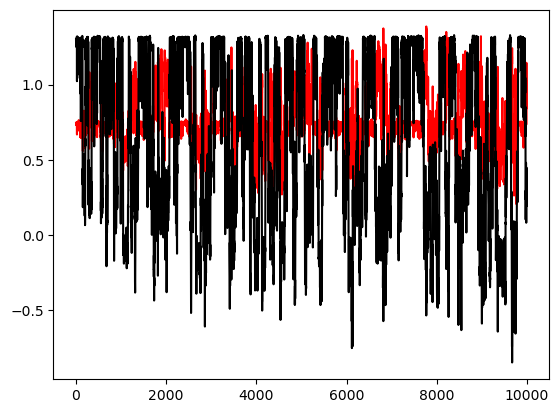

In [119]:
#first plot the colvar
colvar_9=np.loadtxt('../Exercises/Exercise_9/colvar')
print(colvar_9[10:])
plt.plot(colvar_9[:,0],colvar_9[:,1],'r')
plt.plot(colvar_9[:,0],colvar_9[:,2],'k')

In [133]:
bias_hhh=np.loadtxt('../Exercises/Exercise_9/biased_histogram.dat')
bias_hhh.shape
bias_hhh[:,0]

array([-1.5 , -1.48, -1.46, ...,  2.46,  2.48,  2.5 ])

In [138]:
unbias_hh=np.loadtxt('../Exercises/Exercise_9/my_histogram.dat')
unbias_hh.shape
unbias_hh[:,2]

array([0., 0., 0., ..., 0., 0., 0.])

In [152]:
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
x = bias_hhh[:,0]
y = bias_hhh[:,1]
z1= bias_hhh[:,2]

# Create grid values for x and y
xi = np.linspace(min(x), max(x), 1500)
yi = np.linspace(min(y), max(y), 1500)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values onto the grid
bias_P = griddata((x, y), z1, (xi, yi), method='cubic')

Text(0, 0.5, 'cv2')

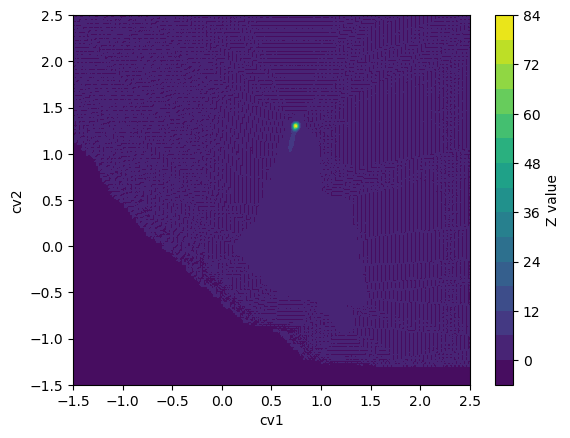

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot contours
#contour = plt.contour(xi, yi, bias_P, 50, cmap='viridis')

contourf = plt.contourf(xi, yi, bias_P, 15, cmap='viridis')
plt.colorbar(contourf, label='Z value')
ax.set_xlabel('cv1')
ax.set_ylabel('cv2')


At the end of simulation, the population in cv1 and cv2 grid is almost even, except one point at 1.225 0.75
Ideally, it should be even all over the grid. (maximaze the entropy)

In [140]:
import glob

# Function to read in histogram data and normalization
def readhistogram( fname ) :
        # Read in the histogram data
        data = np.loadtxt( fname )
        with open( fname, "r" ) as myfile :
                for line in myfile :
                        if line.startswith("#! SET normalisation") : norm = line.split()[3]
        return float(norm), data[:,2]

# Calculate weighted average
norm1, hist1 = readhistogram( "../Exercises/Exercise_9/my_histogram.dat" )
N, average = norm1, norm1*hist1
for filen in glob.glob( "../Exercises/Exercise_9/analysis.*.my_histogram.dat") : 
    norm, histn = readhistogram(filen)
    N, average = N + norm, average + norm*histn
average = average / N

# Calculate errors 
norm1, hist1 = readhistogram( "../Exercises/Exercise_9/my_histogram.dat" )
error, nsum = norm1*norm1*(hist1-average)**2, norm1
for filen in glob.glob( "../Exercises/Exercise_9/analysis.*.my_histogram.dat") : 
    norm, histn = readhistogram(filen)
    error, nsum = error + norm*norm*(histn-average)**2, nsum + norm
error = np.sqrt( error / (nsum*nsum) )

# Convert to free energy 
fes = -0.1*np.log( average+ 1e-6 )
# Convert to error in fes
ferr = 0.1*error / (average+1e-6 )

In [160]:
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
x = unbias_hh[:, 0]
y = unbias_hh[:, 1]
z1 = fes
z2 = ferr

# Create grid values for x and y
xi = np.linspace(min(x), max(x), 1500)
yi = np.linspace(min(y), max(y), 1500)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values onto the grid
ff1 = griddata((x, y), z1, (xi, yi), method='cubic')
ff2 = griddata((x, y), z2, (xi, yi), method='cubic')


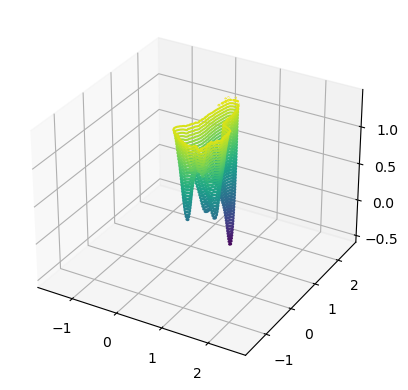

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot contours
contour = ax.contour3D(xi, yi, zi, 50, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

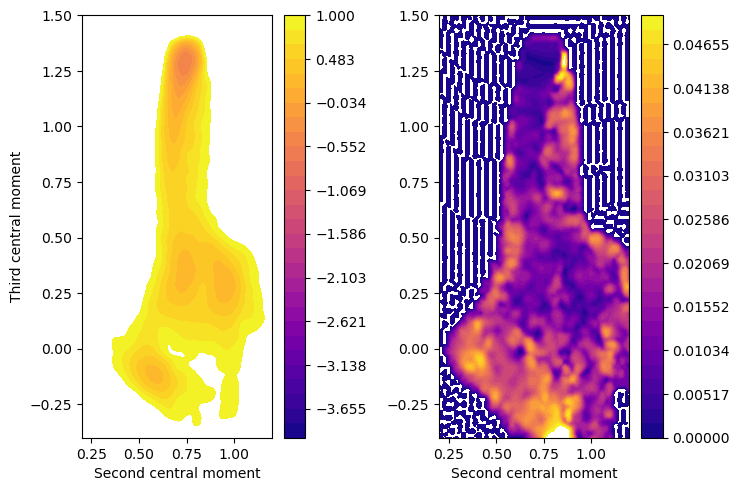

In [161]:
contours = np.linspace(-4,1,30)
contours2 = np.linspace(0,0.05,30)

fig, (ax1,ax2) = plt.subplots(1,2)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.5)
im1 = ax1.contourf( xi, yi, ff1, levels=contours, cmap='plasma' )
im2 = ax2.contourf( xi, yi, ff2, levels=contours2, cmap='plasma' )
ax1.set_xlim(0.2, 1.2 )
ax1.set_ylim(-0.4, 1.5 )
ax2.set_xlim(0.2, 1.2 )
ax2.set_ylim(-0.4, 1.5 )
#ax2.set_xlim(0.2, 1.2 )
ax1.set_xlabel("Second central moment")
ax2.set_xlabel("Second central moment")
ax1.set_ylabel("Third central moment")
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
#ax2.set_xlabel("Second moment")
#plt.savefig("two_histograms.png", bbox_inches='tight')
plt.savefig("masterclass-21-2-fes_errors.png")